# Stroke Prediction

**Attribute Information**

In [1]:
#importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
from scipy.stats import norm #normal the continuous random variable

In [2]:
# Load the data
data = pd.read_csv("C:/Users/Anusha GS/Downloads/archive (4)/healthcare-dataset-stroke-data.csv")

In [3]:
# view dimensions of dataset
data.shape

(5110, 12)

In [4]:
#for displaying all the columns
pd.set_option('display.max_columns', None)

In [5]:
# preview the dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# reading the last five columns of the dataset 
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
# getting statistical descriptions of the data
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# view summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
#getting the datatypes of feature
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
# getting unique values from each column, so we know which values to convert to numerical
for col in data.columns:
    print(col,data[col].unique())

id [ 9046 51676 31112 ... 19723 37544 44679]
gender ['Male' 'Female' 'Other']
age [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e

# Exploratory Data Analysis 

In [11]:
# Convert categorical variables to numerical using get_dummies
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [12]:
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [13]:
# check missing values in variables

data.isnull().sum()

id                                  0
age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
gender_Female                       0
gender_Male                         0
gender_Other                        0
ever_married_No                     0
ever_married_Yes                    0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Rural                0
Residence_type_Urban                0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [14]:
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [15]:
# check frequency distribution of values class variable
data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [16]:
# check missing values in variables

data.isnull().sum()

id                                  0
age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
gender_Female                       0
gender_Male                         0
gender_Other                        0
ever_married_No                     0
ever_married_Yes                    0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Rural                0
Residence_type_Urban                0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [17]:
# Filling the feature 'bmi' with the median of it's values.
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [18]:
data.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [19]:
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.000000,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [20]:
# check frequency distribution of values class variable
data["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


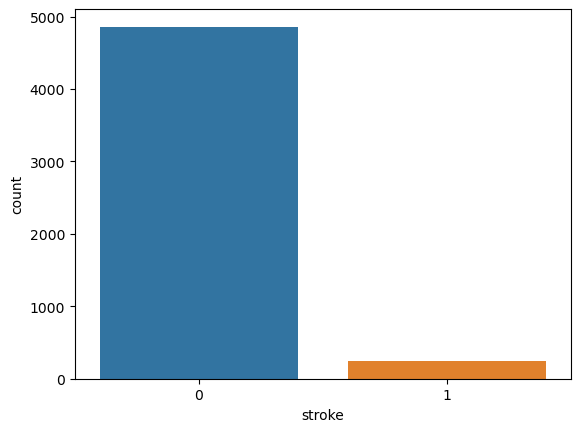

In [21]:
sns.countplot(data['stroke'])
plt.show()

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


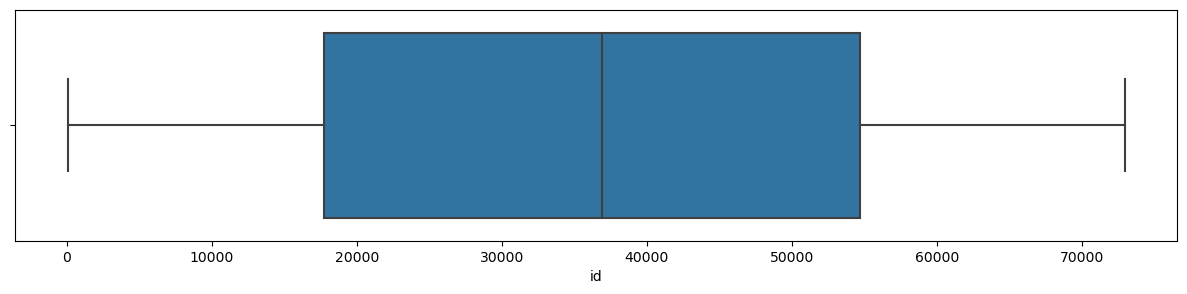

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


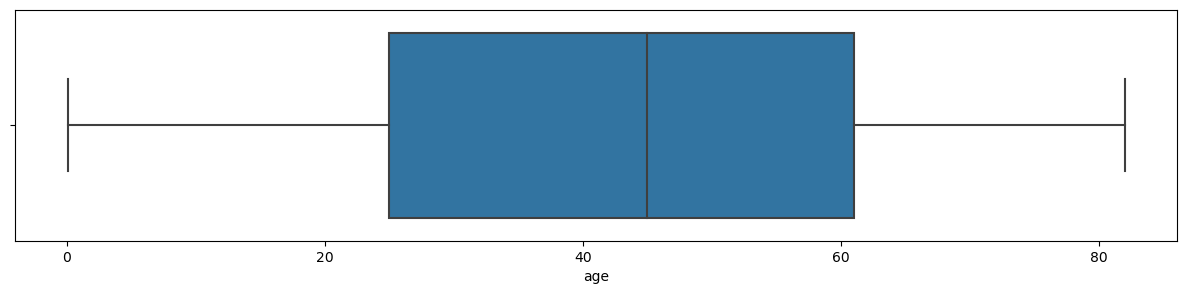

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


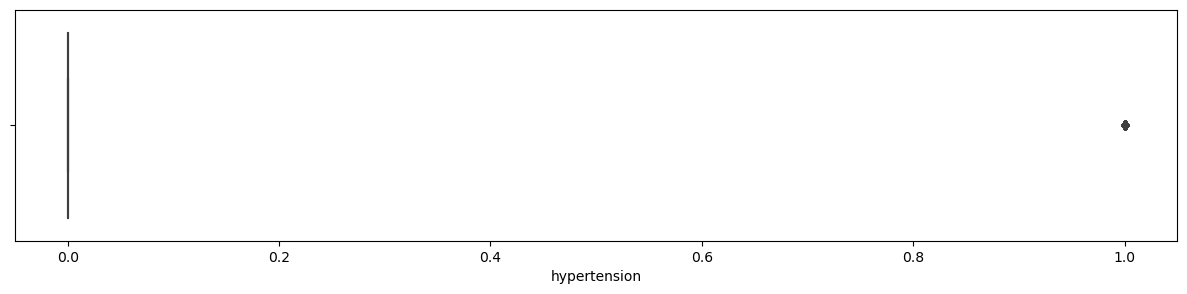

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


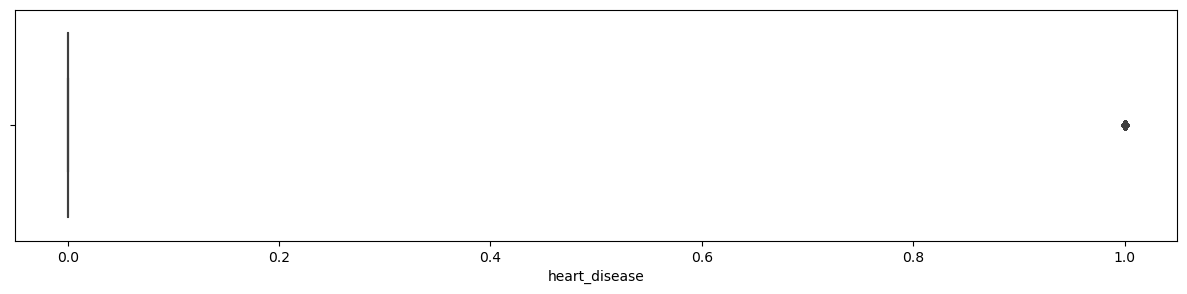

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


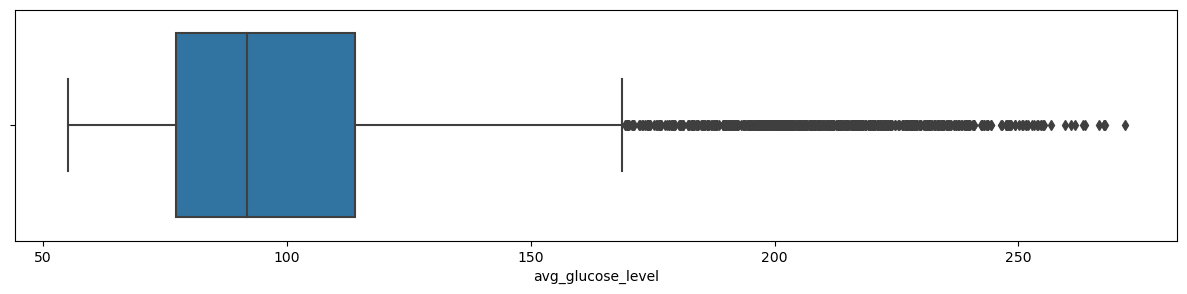

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


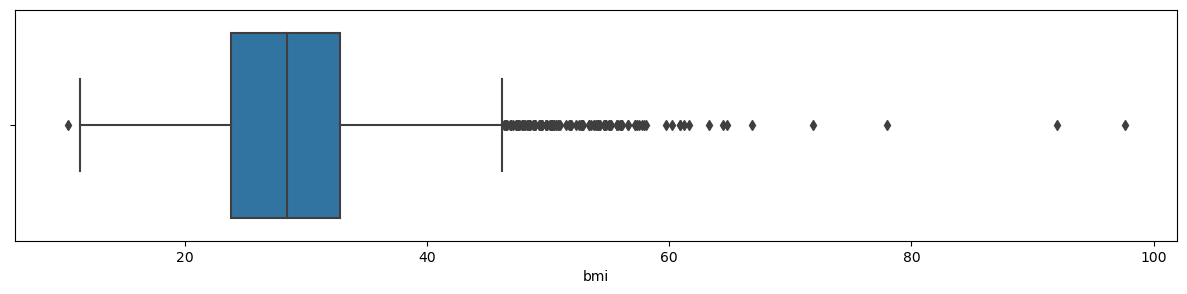

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


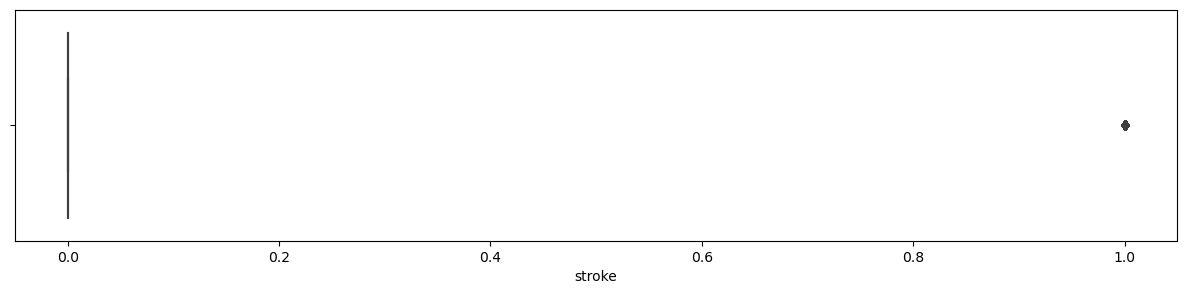

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


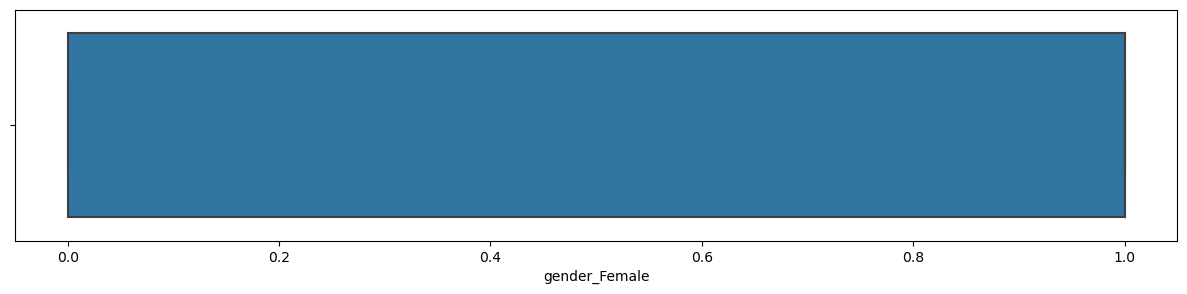

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


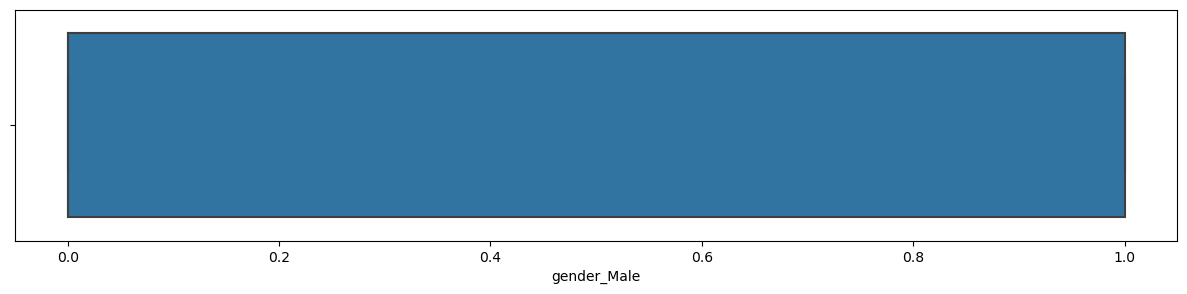

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


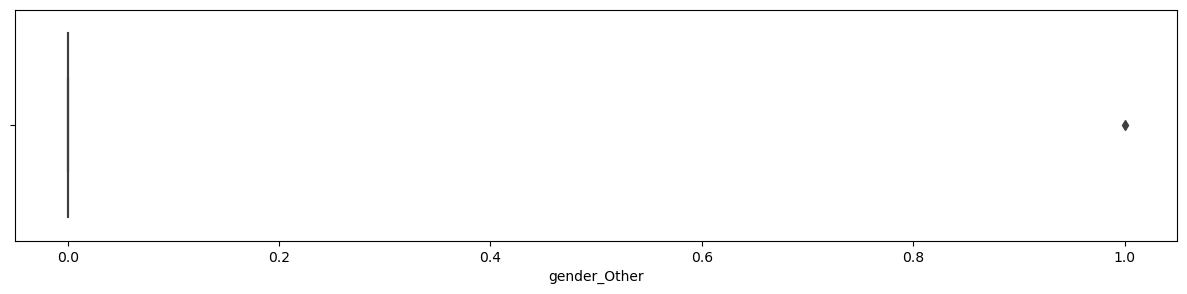

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


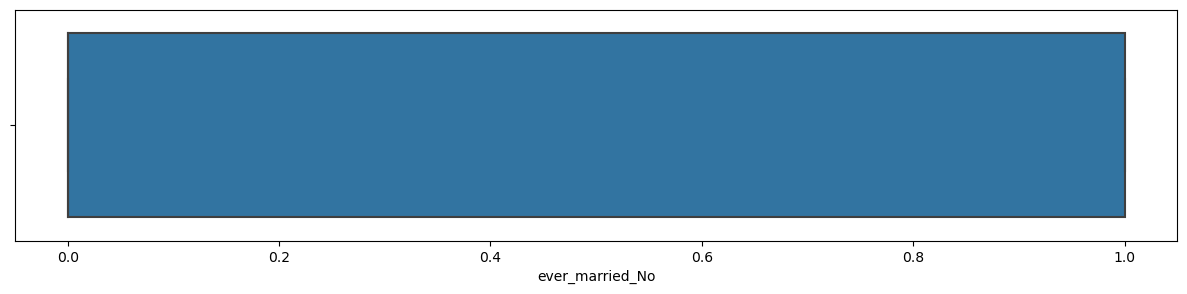

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


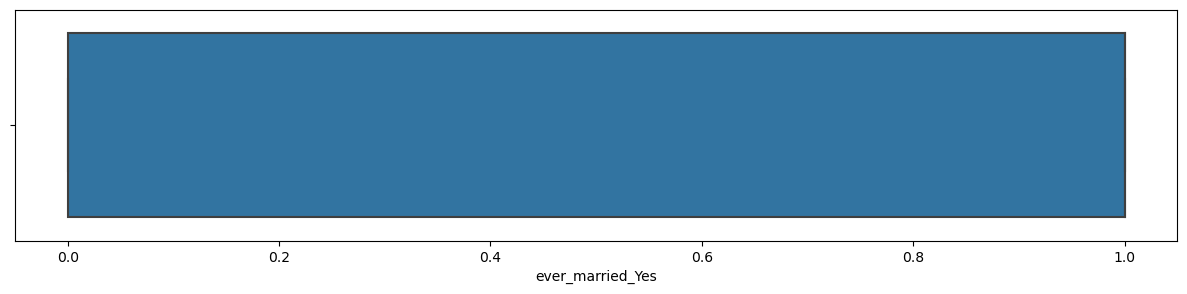

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


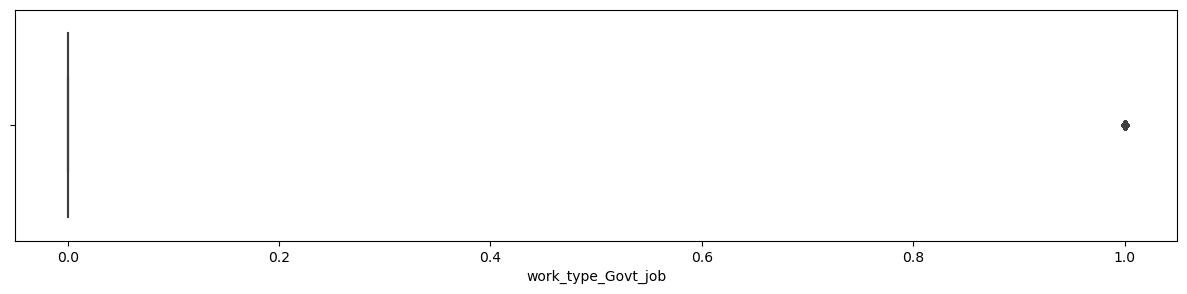

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


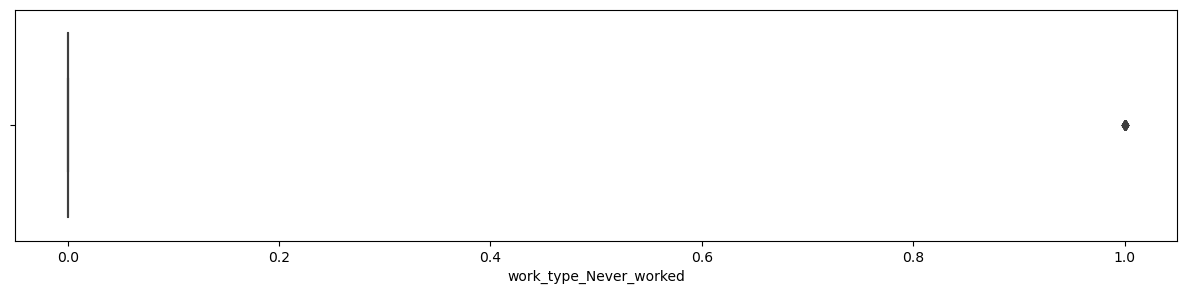

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


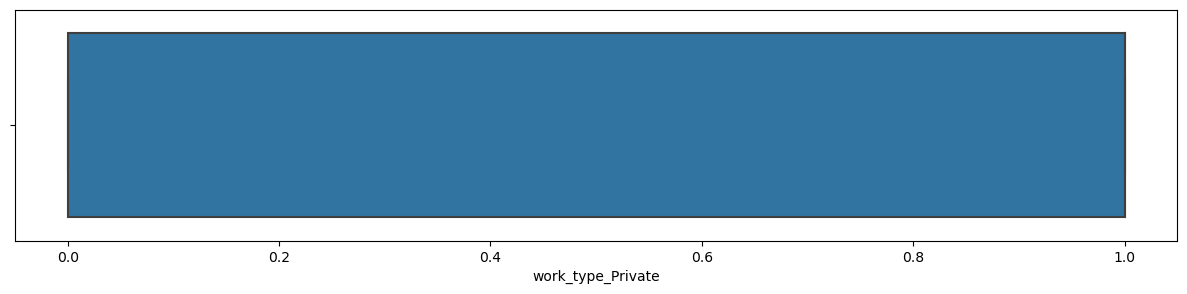

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


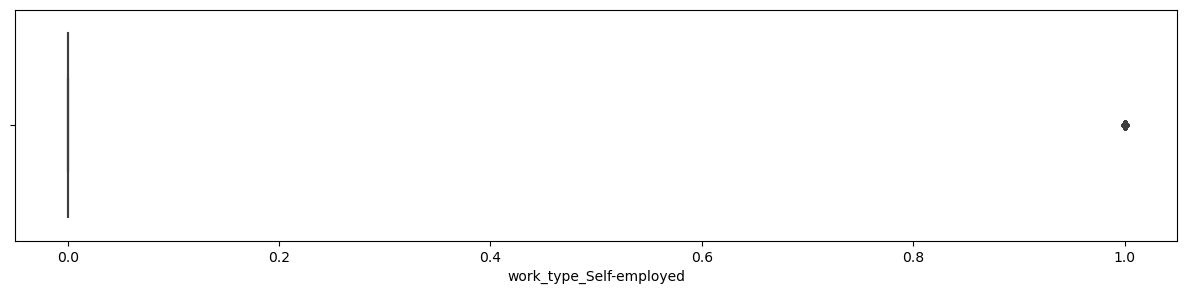

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


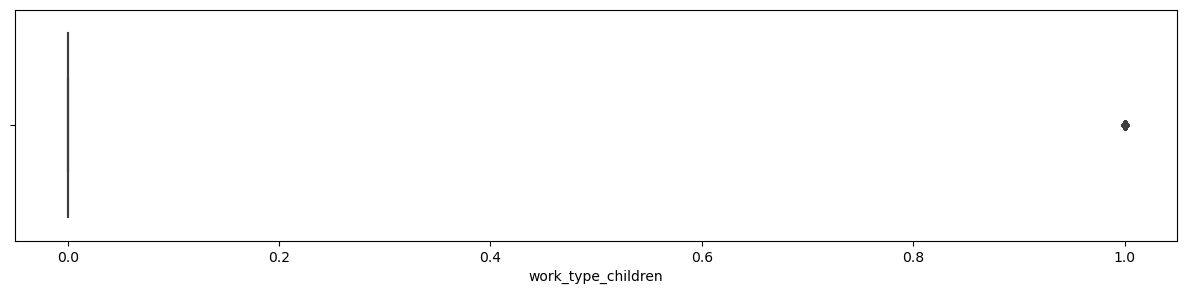

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


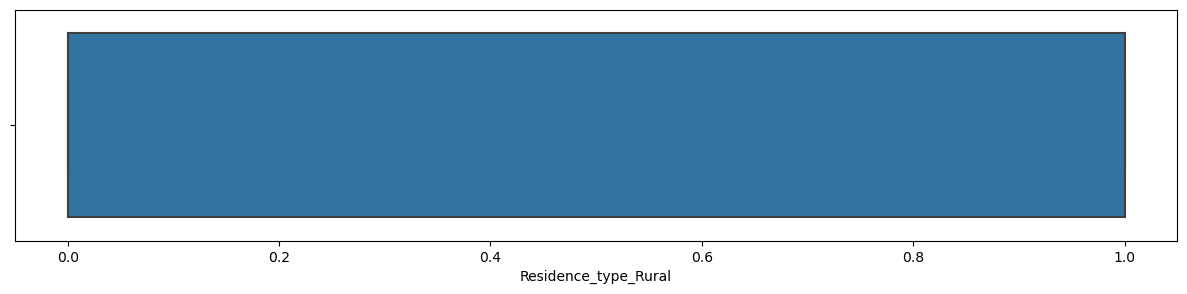

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


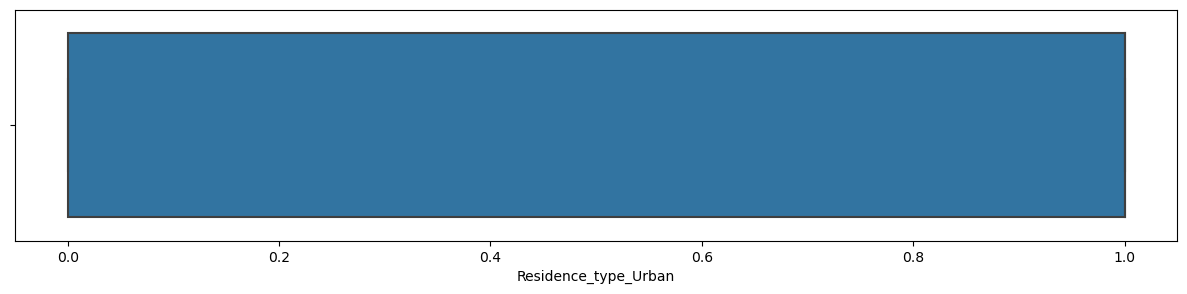

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


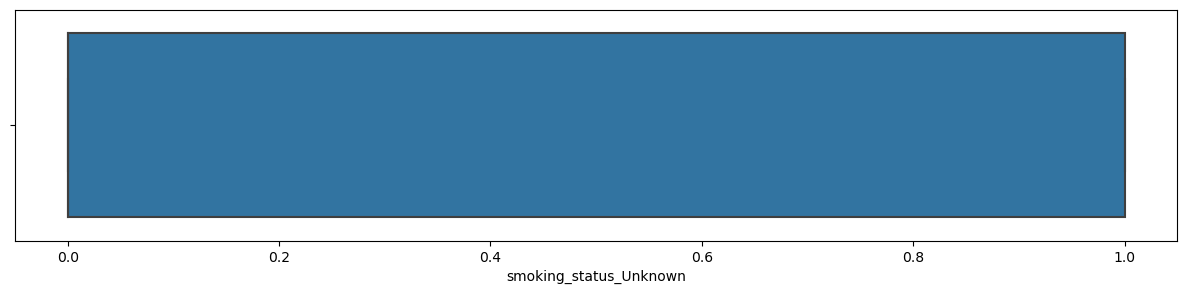

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


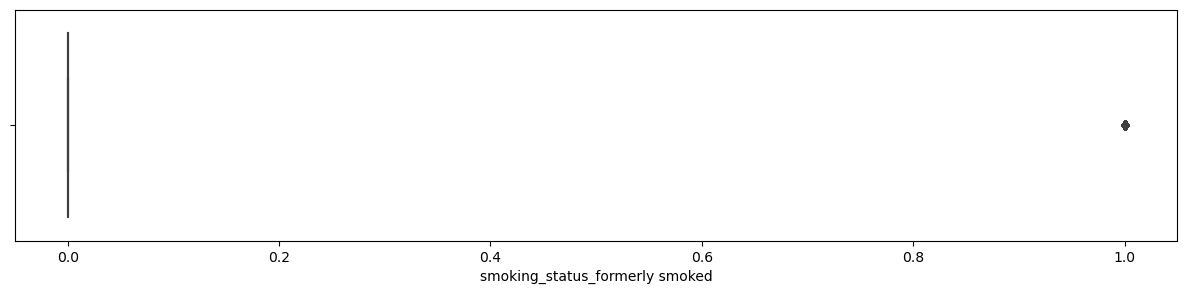

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


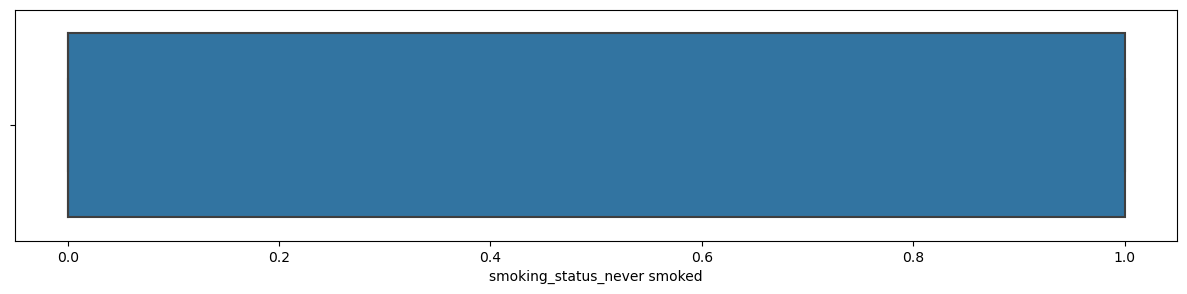

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


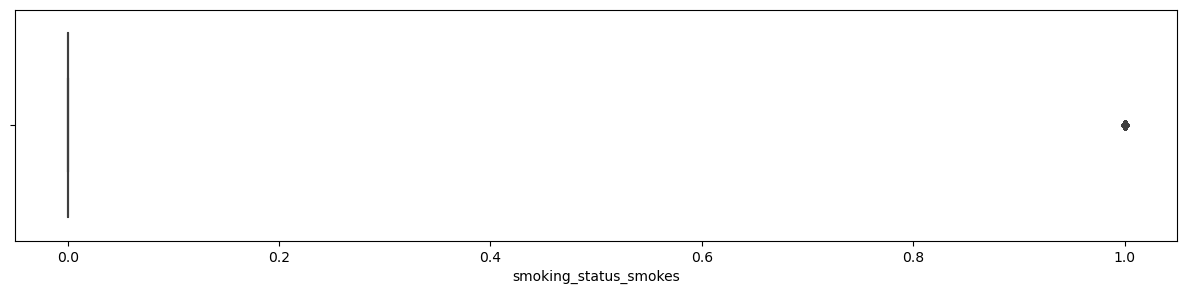

In [22]:
for col in data.select_dtypes(include = [np.number]):
    plt.figure(figsize=(15,3))
    sns.boxplot(data[col])
    plt.show()

In [23]:
#Removing outliers
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = column[(column < lower_limit) | (column > upper_limit)]
    column = column[(column >= lower_limit) & (column <= upper_limit)]
    return column, outliers

# Remove outliers in 'bmi' column
data['bmi'], bmi_outliers = remove_outliers(data['bmi'])
print(f'Removed {len(bmi_outliers)} outliers from the "bmi" column.')

# Remove outliers in 'avg_glucose_level' column
data['avg_glucose_level'], glucose_outliers = remove_outliers(data['avg_glucose_level'])
print(f'Removed {len(glucose_outliers)} outliers from the "avg_glucose_level" column.')

Removed 126 outliers from the "bmi" column.
Removed 627 outliers from the "avg_glucose_level" column.


In [24]:
# Scale the continuous variables
data['age'] = (data['age'] - data['age'].mean()) / data['age'].std()
data['avg_glucose_level'] = (data['avg_glucose_level'] - data['avg_glucose_level'].mean()) / data['avg_glucose_level'].std()
data['bmi'] = (data['bmi'] - data['bmi'].mean())/ data['bmi'].std()

# Train_test_split

In [25]:
X = data.drop(['stroke'], axis=1)
y = data['stroke']

In [26]:
# Split the data into training and testing sets
train = data.sample(frac=0.8, random_state=42)
test = data.drop(train.index)

# Naive Bayes Classifier

In [27]:
class NaiveBayes:
    def __init__(self, classes):
        self.classes = classes

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(self.classes)

        # Initialize mean, variance, and prior probability for each class
        self.mean = np.zeros((n_classes, n_features))
        self.var = np.zeros((n_classes, n_features))
        self.priors = np.zeros(n_classes)

        # Compute mean, variance, and prior probability for each class
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        # Compute the posterior probability for each class and choose the class with the highest probability
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            class_conditional = np.sum(np.log(norm(self.mean[idx], self.var[idx]).pdf(X)), axis=1)
            posterior = prior + class_conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]


In [28]:
def accuracy_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred)/len(y_true) *100
    return accuracy       

In [29]:
# Split the training and testing data into features and labels
X_train = train.drop(['id', 'stroke'], axis=1).values
y_train = train['stroke'].values
X_test = test.drop(['id', 'stroke'], axis=1).values
y_test = test['stroke'].values

In [30]:
X_train.shape , X_test.shape

((4088, 21), (1022, 21))

In [31]:
y_train.shape, y_test.shape

((4088,), (1022,))

In [32]:
# Create an instance of the Naive Bayes classifier and fit the training data
clf = NaiveBayes(classes=[0, 1])
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
#predictions=predictions.reshape(-1,1)
print("Naive Bayes classification accuracy ",accuracy_score(y_test,predictions))

Naive Bayes classification accuracy  95.79256360078277


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_21056\2146667347.py:26: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(norm(self.mean[idx], self.var[idx]).pdf(X)), axis=1)
C:\Users\Anusha GS\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\Anusha GS\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


# k fold cross validation

In [33]:
def cross_validation_split(X, y, k):
    # Split data into k folds
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    for i in range(k):
        X_train = np.concatenate([X_folds[j] for j in range(k) if j != i])
        y_train = np.concatenate([y_folds[j] for j in range(k) if j != i])
        X_test = X_folds[i]
        y_test = y_folds[i]
        yield X_train, y_train, X_test, y_test

In [34]:
cv = cross_validation_split(X, y, k=5)

In [35]:
cv

<generator object cross_validation_split at 0x00000288ACE03C80>

# GridSearchCV

In [36]:
# Grid search for hyperparameter tuning
params = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

In [37]:
def grid_search(X, y, k, params):
    # Perform grid search over hyperparameters
    best_score = -1
    best_params = None
    for param in params:
        score = 0
        for X_train, y_train, X_test, y_test in cross_validation_split(X, y, k):
            clf = NaiveBayes(classes=[0, 1])
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            score += np.mean(y_pred == y_test)
        score /= k
        if score > best_score:
            best_score = score
            best_params = param
    return best_score

In [38]:
gd = grid_search(X, y, k=5, params=params)

C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_21056\2146667347.py:17: RuntimeWarning: Mean of empty slice.
  self.mean[idx, :] = X_c.mean(axis=0)
C:\Users\Anusha GS\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_21056\2146667347.py:18: RuntimeWarning: Degrees of freedom <= 0 for slice
  self.var[idx, :] = X_c.var(axis=0)
C:\Users\Anusha GS\anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Anusha GS\anaconda3\lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_21056\2146667347.py:26: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(norm(self.mean[idx]

In [39]:
gd

0.9512720156555773

In [40]:
---------------------------------------------------------------

SyntaxError: invalid syntax (1562042010.py, line 1)

In [ ]:
"""# Define the number of folds for cross validation
num_folds = 5

# Calculate the size of each fold
fold_size = len(X_train) // num_folds

# Shuffle the dataset and labels
shuffle_index = np.random.permutation(len(X_train))
shuffled_X = X_train[shuffle_index]
shuffled_y = y_train[shuffle_index]"""

In [ ]:
"""# Create a list to store the accuracy for each fold
accuracy_list = []"""

In [ ]:
"""# Perform k-fold cross validation
for i in range(num_folds):
    # Split the data into training and testing sets for this fold
    X_test = shuffled_X[i*fold_size : (i+1)*fold_size]
    y_test = shuffled_y[i*fold_size : (i+1)*fold_size]
    X_train = np.concatenate((shuffled_X[:i*fold_size], shuffled_X[(i+1)*fold_size:]))
    y_train = np.concatenate((shuffled_y[:i*fold_size], shuffled_y[(i+1)*fold_size:]))

    # Calculate the accuracy for this fold and store it in the list
    accuracy = np.sum(predictions == y_test) / len(y_test)
    accuracy_list.append(accuracy)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(accuracy_list)

print(f"Average accuracy across {num_folds} folds: {avg_accuracy}")"""

In [ ]:
# Grid search for hyperparameter tuning
params = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

best_score = -np.inf
best_params = None

for alpha in params['alpha']:
    clf = NaiveBayes(classes=[0, 1])
    score = cross_val_score(clf, X, y)
    print(f"alpha: {alpha}, score: {score}")
    if score > best_score:
        best_score = score
        best_params = {'alpha': alpha}

print(f"Best params: {best_params}, best score: {best_score}")


In [ ]:
-----------------------------------------------------------------

In [ ]:
def cross_validation_split(X, y, k):
    # Split data into k folds
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    for i in range(k):
        X_train = np.concatenate([X_folds[j] for j in range(k) if j != i])
        y_train = np.concatenate([y_folds[j] for j in range(k) if j != i])
        X_val = X_folds[i]
        y_val = y_folds[i]
        yield X_train, y_train, X_val, y_val

In [ ]:
-------------------------------------------------------------------------------------------------------

In [ ]:
import numpy as np

class NaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)
        self.n_features = X.shape[1]
        self.mean = np.zeros((self.n_classes, self.n_features))
        self.var = np.zeros((self.n_classes, self.n_features))
        self.prior = np.zeros(self.n_classes)
        
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0)
            self.prior[c] = X_c.shape[0] / X.shape[0]
    
    def predict(self, X):
        posteriors = []
        
        for idx, x in enumerate(X):
            posterior = []
            for c in self.classes:
                likelihood = np.exp(-((x - self.mean[c]) ** 2) / (2 * self.var[c]))
                prior = np.log(self.prior[c])
                posterior.append(np.sum(np.log(likelihood + 1e-10)) + prior)
            posteriors.append(posterior)
        
        return np.argmax(posteriors, axis=1)
    
    def score(self, X, y):
        return (self.predict(X) == y).mean()

def cross_val_score(estimator, X, y, cv=5):
    scores = []
    fold_size = X.shape[0] // cv
    
    for i in range(cv):
        start = i * fold_size
        end = (i + 1) * fold_size if i != cv - 1 else X.shape[0]
        
        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)
        X_val = X[start:end]
        y_val = y[start:end]
        
        estimator.fit(X_train, y_train)
        score = estimator.score(X_val, y_val)
        scores.append(score)
    
    return np.mean(scores)

# Grid search for hyperparameter tuning
params = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

best_score = -np.inf
best_params = None

for alpha in params['alpha']:
    nb = NaiveBayes(alpha=alpha)
    score = cross_val_score(nb, X, y)
    print(f"alpha: {alpha}, score: {score}")
    if score > best_score:
        best_score = score
        best_params = {'alpha': alpha}

print(f"Best params: {best_params}, best score: {best_score}")


In [ ]:
------------------------------------------------------------------

In [ ]:
import numpy as np

# Define your dataset and labels
dataset = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9]])
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Define the number of folds for cross validation
num_folds = 5

# Calculate the size of each fold
fold_size = len(dataset) // num_folds

# Shuffle the dataset and labels
shuffle_index = np.random.permutation(len(dataset))
shuffled_dataset = dataset[shuffle_index]
shuffled_labels = labels[shuffle_index]

# Define the Naive Bayes classifier
class NaiveBayes:
    def __init__(self):
        self.class_prob = None
        self.class_means = None
        self.class_vars = None

    def fit(self, X, y):
        self.class_prob = np.bincount(y) / len(y)
        self.class_means = np.array([np.mean(X[y == i], axis=0) for i in range(len(self.class_prob))])
        self.class_vars = np.array([np.var(X[y == i], axis=0) for i in range(len(self.class_prob))])

    def predict(self, X):
        log_probs = []
        for i in range(len(self.class_prob)):
            log_prob = np.sum(-0.5 * np.log(2 * np.pi * self.class_vars[i])
                              - 0.5 * (X - self.class_means[i]) ** 2 / self.class_vars[i], axis=1)
            log_probs.append(log_prob + np.log(self.class_prob[i]))
        log_probs = np.array(log_probs).T
        return np.argmax(log_probs, axis=1)

# Create a list to store the accuracy for each fold
accuracy_list = []

# Perform k-fold cross validation
for i in range(num_folds):
    # Split the data into training and testing sets for this fold
    test_data = shuffled_dataset[i*fold_size : (i+1)*fold_size]
    test_labels = shuffled_labels[i*fold_size : (i+1)*fold_size]
    train_data = np.concatenate((shuffled_dataset[:i*fold_size], shuffled_dataset[(i+1)*fold_size:]))
    train_labels = np.concatenate((shuffled_labels[:i*fold_size], shuffled_labels[(i+1)*fold_size:]))

    # Train the Naive Bayes classifier
    nb = NaiveBayes()
    nb.fit(train_data, train_labels)

    # Test the Naive Bayes classifier on the testing set
    predicted_labels = nb.predict(test_data)

    # Calculate the accuracy for this fold and store it in the list
    accuracy = np.sum(predicted_labels == test_labels) / len(test_labels)
    accuracy_list.append(accuracy)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(accuracy_list)

print(f"Average accuracy across {num_folds} folds: {avg_accuracy}")


In [ ]:
------------------------------------------------------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


class NaiveBayes:
    def __init__(self, alpha=1):
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # calculate prior probabilities for each class
        self.priors = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.priors[i] = np.mean(y == c)

        # calculate conditional probabilities for each feature and class
        self.cond_probs = np.zeros((n_classes, n_features))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.cond_probs[i, :] = ((X_c.sum(axis=0)) + self.alpha) / (len(X_c) + self.alpha*n_features)

    def predict(self, X):
        y_pred = []
        for x in X:
            # calculate posterior probabilities for each class and choose the class with highest probability
            posteriors = []
            for i, c in enumerate(self.classes):
                prior = np.log(self.priors[i])
                cond_prob = np.sum(np.log(self.cond_probs[i, :]) * x)
                posterior = prior + cond_prob
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return y_pred


# Load dataset
df = pd.read_csv('stroke.csv')

# Preprocess dataset
df = df.drop(['id'], axis=1)
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
X = df.drop(['stroke'], axis=1).values
y = df['stroke'].values

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
best_accuracy = 0
for alpha in [0.1, 0.5, 1, 5, 10]:
    nb = NaiveBayes(alpha=alpha)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

# Train the model with the best hyperparameters
nb = NaiveBayes(alpha=best_alpha)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion)
